## King's County Housing Capstone Project

By: Tyrrance P Miller Jr.


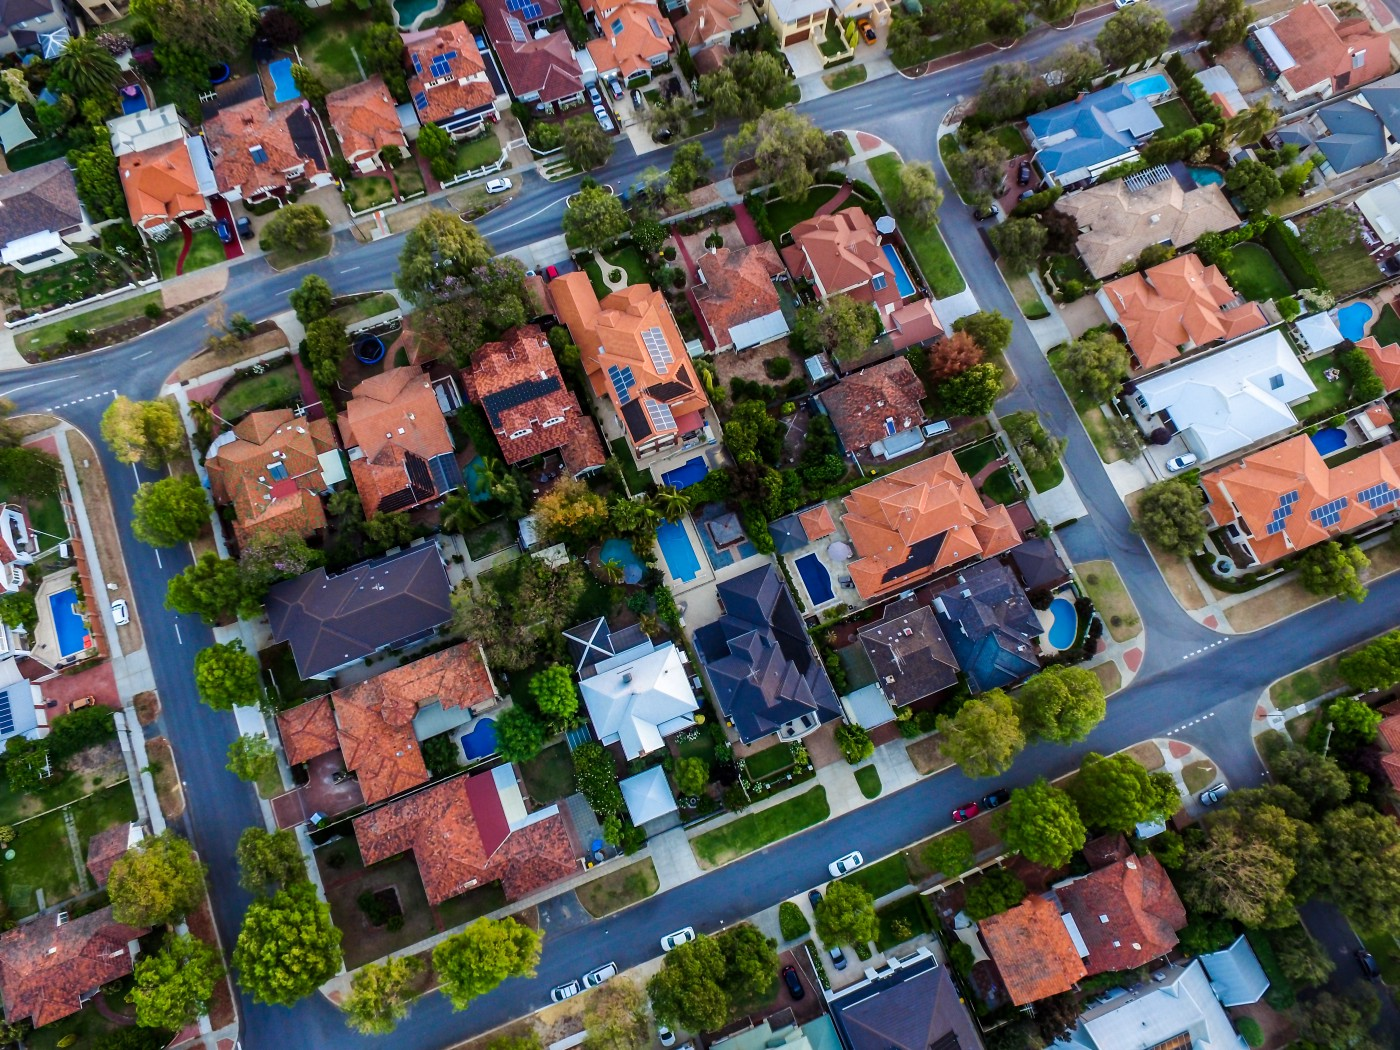

## Business Understanding

KC Real estate development group is looking to build a new coummunity with brand new homes. They are trying to decicde on what features they should include in their houses that will produce the highest profit possible. In this project I will be selecting 2 main features to consider when building the houses and show how they affect the price of the homes and make the appropriate recommendations for the best results in profit.

## Data Understanding
 
The dataset that is being used for this project is from the King's County Housing portal, which contains roughly over 30,000 rows of data for 2021-2022 home sales in King County, Washington. I will be using this data to create statical models that will help determine the best features and how they relate to price (Regression Target).

## Data Exploration and Modeling

I first started by preparing my data by pulling the dataset and overviewing the columns and rows to see what features would be best to use and then took out the outliers in the data set. I then created my baseline models and iterations of the models to eventually got to my final model and the two best features.

### Loading the Data

In [43]:
import pandas as pd
import numpy as np
import seaborn as sb

import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm

df = pd.read_csv("data/kc_house_data.csv")
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [44]:
df.shape

(30155, 25)

### Data Exploration

In [45]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [48]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [49]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

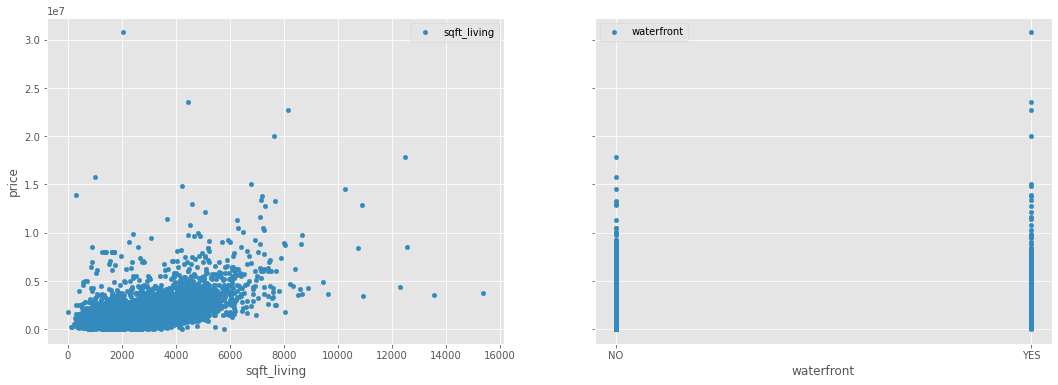

In [50]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'waterfront']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
    axs[idx].legend()

From the Visualization i above we can see that there is a positive skew in the scatter plot for "Sqft_Living" which indicates this particular feature is the first of two features that show the realtionship to price so far.

### Data Cleaning

In order to properly clean the data it is important that I removed any outliers in the data by performing a stats.zscore function.

In [51]:
no_outliers = df.loc[stats.zscore(df['price']) < 2.5]
no_outliers.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [52]:
no_outliers['price'].describe()

count    2.950300e+04
mean     1.020278e+06
std      5.605828e+05
min      2.736000e+04
25%      6.400000e+05
50%      8.500000e+05
75%      1.265000e+06
max      3.333333e+06
Name: price, dtype: float64

After cleaning the data I was able to find the mean and the Standard Deviation.

<AxesSubplot:>

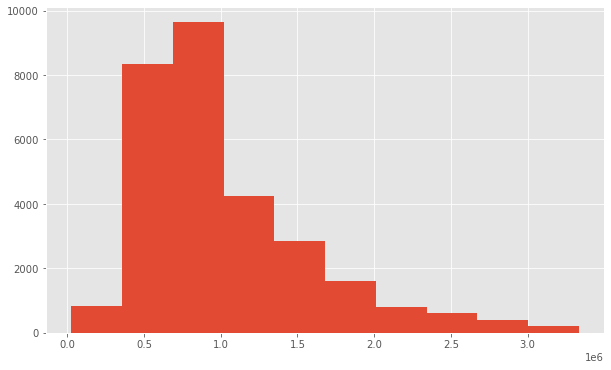

In [53]:
no_outliers['price'].hist(figsize=(10,6))

In [54]:
no_outliers.shape

(29503, 25)

In [55]:
no_outliers2 = no_outliers.loc[stats.zscore(no_outliers['sqft_living']) < 3]
no_outliers2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


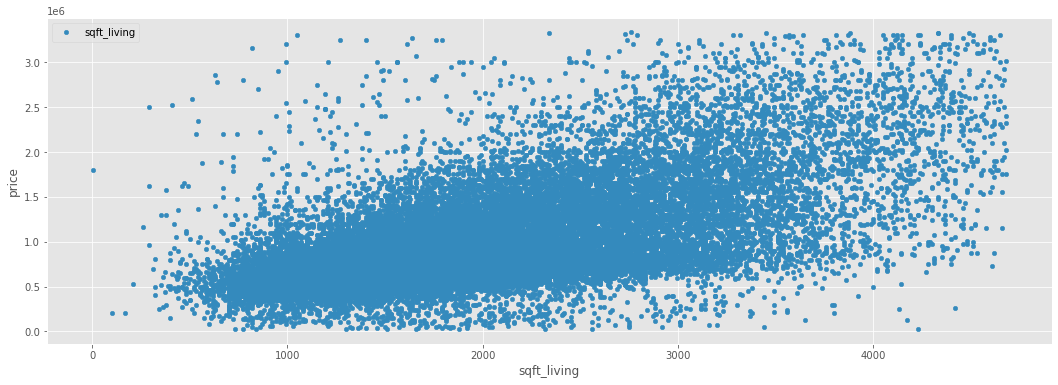

In [56]:
fig, axs = plt.subplots(1, sharey=True, figsize=(18, 6))
no_outliers2.plot(kind='scatter', x='sqft_living', y='price', ax=axs, label='sqft_living')
axs.legend()

In [57]:
no_outliers2.shape

(29262, 25)

## The Data Model

In this section of the project I will perform multiple data models in order to ensure that all the data objects required by this database are accurately represented. Omission of data will lead to creation of faulty reports and produce incorrect data analytics and results.

I will also perform this model to define the relationship between key features in the dataset and the price of the homes to get the proper percentage of variance. 

### Baseline Model

Starting with 'sqft_living' as the only feature for the baseline model.

In [58]:
y = df['price']
x = df[['sqft_living']]

In [59]:
baseline_model = sm.OLS(y, sm.add_constant(x)).fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:46:59   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The baseline model explains 37% of variance in price. This first model performance is considered to be just a test of only one particular feature (sqft_Living) which performed poorly by itself. This model performed poorly due to a low Percentage in variance.

### Model Iteration

In [61]:
y = df['price']
x = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built']]

In [62]:
model2 = sm.OLS(y, sm.add_constant(x)).fit()
model2.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     4070.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:47:01   Log-Likelihood:            -4.4832e+05
No. Observations:               30155   AIC:                         8.966e+05
Df Residuals:                   30149   BIC:                         8.967e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.151e+06   3.01e+05     27.084      0.000    7.56e+06    8.74e+06
sqft_living   607.4111      6.917     87.811      0.000     593.853     620.969
bedrooms    -1.795e+05   5447.706    -32.954      0.000    -1.9e+05   -1.69e+05
bathrooms    1.392e+05   7857.812     17.715      0.000    1.24e+05    1.55e+05
floors        5.21e+04   8608.197      6.053      0.000    3.52e+04     6.9e+04
yr_built    -4110.0441    156.361    -26.286      0.000   -4416.519   -3803.569
==============================================================================
Omnibus:                    43429.582   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48908508.762
Skew:                           8.173   Prob(JB):                         0.00
Kurtosis:                     199.618   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The first iteration of the baseline model now shows 40% of variance in price after adding a few more features.

We can see that the more features I added the better the model is getting. After adding 'bedrooms', 'bathrooms', 'floors', and 'yr_built' our variance percentage went up by 10% which is a better performing model, but I will peform a couple more in order to get the best result. 

In [63]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


I will add a non numerical feature ('grade') to the model along with the other features to generate a better performing model.

In [64]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [65]:
feats3 = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']

In [66]:
df[feats3]

,sqft_living,bedrooms,bathrooms,floors,grade
0,1180,4,1.0,1.0,7 Average
1,2770,5,2.5,1.0,7 Average
2,2880,6,2.0,1.0,7 Average
3,2160,3,3.0,2.0,9 Better
4,1120,2,2.0,2.0,7 Average
...,...,...,...,...,...
30150,1910,5,2.0,1.5,8 Good
30151,2020,3,2.0,2.0,7 Average
30152,1620,3,2.0,1.0,7 Average
30153,2570,3,2.5,2.0,8 Good


In [67]:
model_df3 = pd.get_dummies(df[feats3], columns=['grade'], drop_first=True)

In [68]:
y = df['price']

In [69]:
model3 = sm.OLS(y, sm.add_constant(model_df3)).fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1649.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:47:03   Log-Likelihood:            -4.4662e+05
No. Observations:               30155   AIC:                         8.933e+05
Df Residuals:                   30138   BIC:                         8.934e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.419e+06   4.63e+05      3.065      0.002    5.12e+05    2.33e+06
sqft_living           325.1183      8.037     40.455      0.000     309.366     340.870
bedrooms            -6.585e+04   5386.255    -12.225      0.000   -7.64e+04   -5.53e+04
bathrooms            6.558e+04   7305.226      8.978      0.000    5.13e+04    7.99e+04
floors              -9.726e+04   7916.522    -12.286      0.000   -1.13e+05   -8.17e+04
grade_10 Very Good   -5.32e+04   4.64e+05     -0.115      0.909   -9.62e+05    8.56e+05
grade_11 Excellent   8.276e+05   4.65e+05      1.780      0.075   -8.36e+04    1.74e+06
grade_12 Luxury      1.963e+06   4.68e+05      4.195      0.000    1.05e+06    2.88e+06
grade_13 Mansion     3.455e+06   4.84e+05      7.134      0.000    2.51e+06     4.4e+06
grade_2 Substandard -1.122e+06   6.55e+05     -1.714      0.087   -2.41e+06    1.61e+05
grade_3 Poor         -1.06e+06   4.97e+05     -2.131      0.033   -2.03e+06   -8.51e+04
grade_4 Low         -8.567e+05   4.72e+05     -1.815      0.070   -1.78e+06    6.84e+04
grade_5 Fair        -9.286e+05   4.64e+05     -2.001      0.045   -1.84e+06   -1.88e+04
grade_6 Low Average -9.621e+05   4.63e+05     -2.077      0.038   -1.87e+06   -5.42e+04
grade_7 Average     -9.487e+05   4.63e+05     -2.048      0.041   -1.86e+06   -4.09e+04
grade_8 Good        -8.231e+05   4.63e+05     -1.777      0.076   -1.73e+06    8.49e+04
grade_9 Better      -5.166e+05   4.63e+05     -1.115      0.265   -1.43e+06    3.92e+05
==============================================================================
Omnibus:                    43080.845   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50151700.368
Skew:                           8.021   Prob(JB):                         0.00
Kurtosis:                     202.143   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second iteration of the baseline model now shows 47% of variance in price after modifying the features. This model performed a little better by adding "grade" which is considered a non numerical feature. I will perform one last model and add a few more features to see if the model improves.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [72]:
feats4 = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'waterfront', 'heat_source']


In [73]:
model_df4 = pd.get_dummies(df[feats4], columns=['grade', 'condition', 'waterfront', 'heat_source'], drop_first=True)


In [74]:
model4 = sm.OLS(y, sm.add_constant(model_df4)).fit()
model4.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:47:04   Log-Likelihood:            -4.4577e+05
No. Observations:               30155   AIC:                         8.916e+05
Df Residuals:                   30127   BIC:                         8.918e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          8.366e+05   4.51e+05      1.854      0.064   -4.77e+04    1.72e+06
sqft_living                     295.1354      7.901     37.354      0.000     279.649     310.622
bedrooms                      -5.285e+04   5278.044    -10.014      0.000   -6.32e+04   -4.25e+04
bathrooms                      7.009e+04   7238.359      9.682      0.000    5.59e+04    8.43e+04
floors                        -6.214e+04   8026.575     -7.741      0.000   -7.79e+04   -4.64e+04
grade_10 Very Good             4.122e+05   4.52e+05      0.912      0.362   -4.73e+05     1.3e+06
grade_11 Excellent             1.259e+06   4.53e+05      2.781      0.005    3.72e+05    2.15e+06
grade_12 Luxury                2.364e+06   4.56e+05      5.186      0.000    1.47e+06    3.26e+06
grade_13 Mansion                3.85e+06   4.72e+05      8.162      0.000    2.93e+06    4.77e+06
grade_2 Substandard           -1.092e+06   6.38e+05     -1.711      0.087   -2.34e+06    1.59e+05
grade_3 Poor                  -6.694e+05   4.86e+05     -1.377      0.169   -1.62e+06    2.84e+05
grade_4 Low                   -5.563e+05    4.6e+05     -1.211      0.226   -1.46e+06    3.44e+05
grade_5 Fair                  -5.252e+05   4.52e+05     -1.162      0.245   -1.41e+06    3.61e+05
grade_6 Low Average           -5.251e+05   4.51e+05     -1.164      0.245   -1.41e+06    3.59e+05
grade_7 Average               -4.963e+05   4.51e+05     -1.100      0.271   -1.38e+06    3.88e+05
grade_8 Good                  -3.556e+05   4.51e+05     -0.788      0.431   -1.24e+06    5.29e+05
grade_9 Better                -3.932e+04   4.51e+05     -0.087      0.931   -9.24e+05    8.46e+05
condition_Fair                -3.649e+04   4.28e+04     -0.852      0.394    -1.2e+05    4.74e+04
condition_Good                 5.471e+04   8918.561      6.135      0.000    3.72e+04    7.22e+04
condition_Poor                -6.606e+04   8.26e+04     -0.800      0.424   -2.28e+05    9.58e+04
condition_Very Good            1.438e+05   1.26e+04     11.442      0.000    1.19e+05    1.68e+05
waterfront_YES                 1.113e+06   2.87e+04     38.721      0.000    1.06e+06    1.17e+06
heat_source_Electricity/Solar -9126.5148   8.34e+04     -0.109      0.913   -1.73e+05    1.54e+05
heat_source_Gas                2.508e+04   9475.944      2.646      0.008    6502.097    4.36e+04
heat_source_Gas/Solar           2.79e+05   6.67e+04      4.185      0.000    1.48e+05     4.1e+05
heat_source_Oil                1.294e+05   1.48e+04      8.726      0.000       1e+05    1.58e+05
heat_source_Oil/Solar          8.645e+04   3.19e+05      0.271      0.786   -5.38e+05    7.11e+05
heat_source_Other             -8.848e+04   1.43e+05     -0.618      0.536   -3.69e+05    1.92e+05
=============================================

The last iteration of the baseline model now shows about 50% of variance in price after modifying the features. Which is our best performing model and where I will be pulling the two features that affects the price of the homes.

### Final Model

In [75]:
feats5 = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'waterfront', 'heat_source']

In [76]:
model_df5 = pd.get_dummies(df[feats4], columns=['grade', 'condition', 'waterfront', 'heat_source'], drop_first=True)

In [77]:
final_model = sm.OLS(y, sm.add_constant(model_df4)).fit()
final_model.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:47:06   Log-Likelihood:            -4.4577e+05
No. Observations:               30155   AIC:                         8.916e+05
Df Residuals:                   30127   BIC:                         8.918e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          8.366e+05   4.51e+05      1.854      0.064   -4.77e+04    1.72e+06
sqft_living                     295.1354      7.901     37.354      0.000     279.649     310.622
bedrooms                      -5.285e+04   5278.044    -10.014      0.000   -6.32e+04   -4.25e+04
bathrooms                      7.009e+04   7238.359      9.682      0.000    5.59e+04    8.43e+04
floors                        -6.214e+04   8026.575     -7.741      0.000   -7.79e+04   -4.64e+04
grade_10 Very Good             4.122e+05   4.52e+05      0.912      0.362   -4.73e+05     1.3e+06
grade_11 Excellent             1.259e+06   4.53e+05      2.781      0.005    3.72e+05    2.15e+06
grade_12 Luxury                2.364e+06   4.56e+05      5.186      0.000    1.47e+06    3.26e+06
grade_13 Mansion                3.85e+06   4.72e+05      8.162      0.000    2.93e+06    4.77e+06
grade_2 Substandard           -1.092e+06   6.38e+05     -1.711      0.087   -2.34e+06    1.59e+05
grade_3 Poor                  -6.694e+05   4.86e+05     -1.377      0.169   -1.62e+06    2.84e+05
grade_4 Low                   -5.563e+05    4.6e+05     -1.211      0.226   -1.46e+06    3.44e+05
grade_5 Fair                  -5.252e+05   4.52e+05     -1.162      0.245   -1.41e+06    3.61e+05
grade_6 Low Average           -5.251e+05   4.51e+05     -1.164      0.245   -1.41e+06    3.59e+05
grade_7 Average               -4.963e+05   4.51e+05     -1.100      0.271   -1.38e+06    3.88e+05
grade_8 Good                  -3.556e+05   4.51e+05     -0.788      0.431   -1.24e+06    5.29e+05
grade_9 Better                -3.932e+04   4.51e+05     -0.087      0.931   -9.24e+05    8.46e+05
condition_Fair                -3.649e+04   4.28e+04     -0.852      0.394    -1.2e+05    4.74e+04
condition_Good                 5.471e+04   8918.561      6.135      0.000    3.72e+04    7.22e+04
condition_Poor                -6.606e+04   8.26e+04     -0.800      0.424   -2.28e+05    9.58e+04
condition_Very Good            1.438e+05   1.26e+04     11.442      0.000    1.19e+05    1.68e+05
waterfront_YES                 1.113e+06   2.87e+04     38.721      0.000    1.06e+06    1.17e+06
heat_source_Electricity/Solar -9126.5148   8.34e+04     -0.109      0.913   -1.73e+05    1.54e+05
heat_source_Gas                2.508e+04   9475.944      2.646      0.008    6502.097    4.36e+04
heat_source_Gas/Solar           2.79e+05   6.67e+04      4.185      0.000    1.48e+05     4.1e+05
heat_source_Oil                1.294e+05   1.48e+04      8.726      0.000       1e+05    1.58e+05
heat_source_Oil/Solar          8.645e+04   3.19e+05      0.271      0.786   -5.38e+05    7.11e+05
heat_source_Other             -8.848e+04   1.43e+05     -0.618      0.536   -3.69e+05    1.92e+05
=============================================

From the final model I was able to select the last feature due to the success rate of this model that produced the highest variance of price out of all the other models.  "Waterfront", which is a non-numerical feature, was the last feature I selected due the P value being low and it being a column that was added to make the final model a success. 

/tmp/ipykernel_66/3565920533.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30])


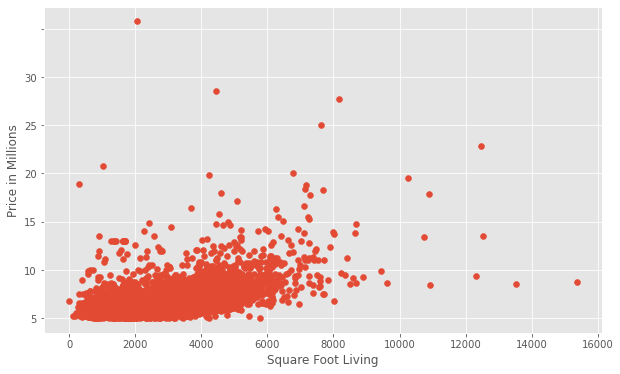

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['sqft_living'], df['price'])
ax.ticklabel_format(style='plain')
ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax.set_ylabel("Price in Millions")
ax.set_xlabel('Square Foot Living')
axs.legend()

The visualization shows a positive correlation of homes that increase in value when the square foot increase.

In [79]:
df['sqft_bin'] = pd.qcut(df['sqft_living'], q=8)

/tmp/ipykernel_66/2276045045.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.groupby('sqft_bin').mean()['price'].plot.bar(figsize=(10,6), xlabel="Square foot of Living Space", ylabel="Price in Millions", title ="Relationship Between Average Price of Homes and Square Foot Living", color='Red').set_yticklabels([0, 5, 10, 15, 20, 25, 30])


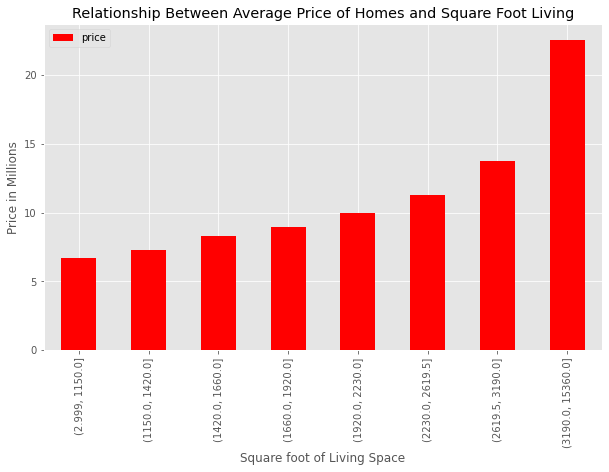

In [80]:
df.groupby('sqft_bin').mean()['price'].plot.bar(figsize=(10,6), xlabel="Square foot of Living Space", ylabel="Price in Millions", title ="Relationship Between Average Price of Homes and Square Foot Living", color='Red').set_yticklabels([0, 5, 10, 15, 20, 25, 30])
plt.legend()


My model determined that for every additional square foot the price will increase by about $295

/tmp/ipykernel_66/1337245356.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.groupby('waterfront').mean()['price'].plot.bar(figsize=(10,6), xlabel="Waterfront", ylabel="Price in Millions", title ="Average Price of Homes with waterfronts vs No Waterfront Homes $", color="Blue").set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40])


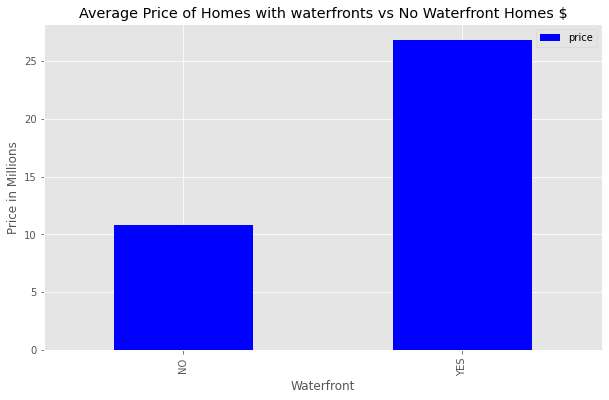

In [81]:
df.groupby('waterfront').mean()['price'].plot.bar(figsize=(10,6), xlabel="Waterfront", ylabel="Price in Millions", title ="Average Price of Homes with waterfronts vs No Waterfront Homes $", color="Blue").set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.legend()


The visualization above and this model also determined that houses with waterfronts sale for more and can potentially produce more profit.
Waterfront homes are projected to increase the price of the homes by approximately $1.1million

## Regression Results

The baseline model I performed was using one feature, 'sqft_living'. This explained 37% of variance in price. After performing a few iterations of my baseline model, I was able to achieve a final model that can explain about 50% of variance in price, showing that more than one feature has an affect on price. 

## Conclusion

According to the results produced in this data modeling analysis I would recommend KC real estate development group to build homes with a larger square foot living space and to consider developing the community in an area where the homes can be waterfront, as those homes sold with a higher average price range. 